# Zomato Data Analysis

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [86]:
dataframe= pd.read_csv("Zomato data.csv")

In [88]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [90]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [92]:
df.shape

(148, 7)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Data Cleaning

# Convert the Data type of Column - rate

In [98]:
def handleRate (value):
    value = str(value).split("/")
    value = value[0];
    return float(value)

In [100]:
df["rate"] = df ["rate"].apply(handleRate)

In [102]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Data Visualization

# What type of restaurant do the majority of customers order from?

Text(0, 0.5, 'Count')

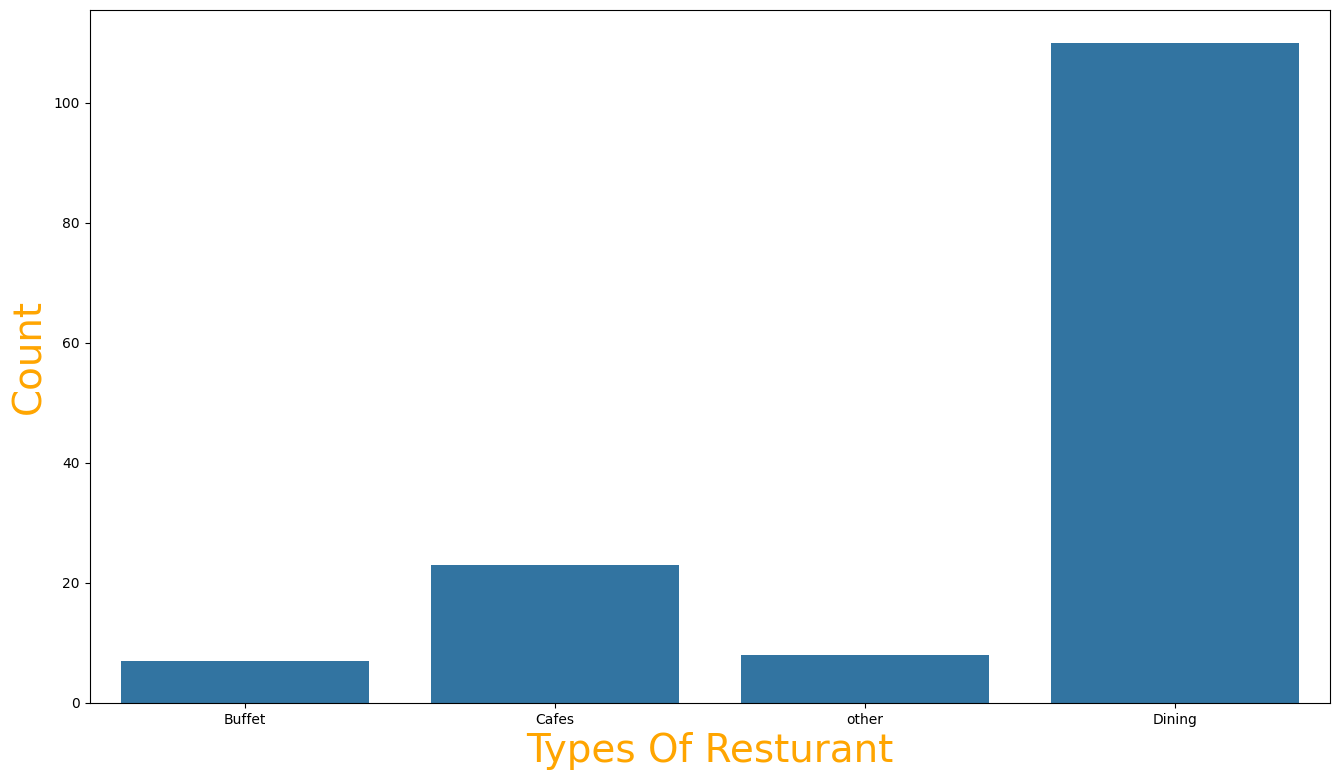

In [166]:
plt.figure(figsize = (16,9))
sns.countplot(x = df ["listed_in(type)"])
plt.xlabel("Types Of Resturant" , c = "orange" , size = 28 )
plt.ylabel("Count" , c = "orange" , size = 28)

 Conclusion :- Majority of the Customer order from dining category 

# How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

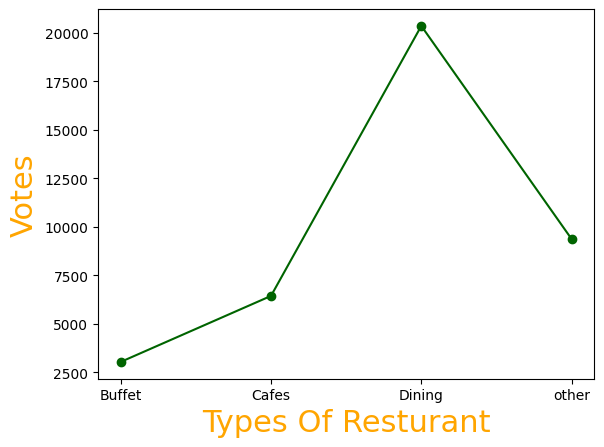

In [178]:
grouped_data = df .groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data })
plt.plot(result , c = "darkgreen" , marker = "o")
plt.xlabel("Types Of Resturant" , c = "Orange" , size = 22 )
plt.ylabel ("Votes" , c = "orange" , size = 22)

Conclusion:- Dining Restaurant has Received Maximum Votes.

# What are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'Rating Distribution')

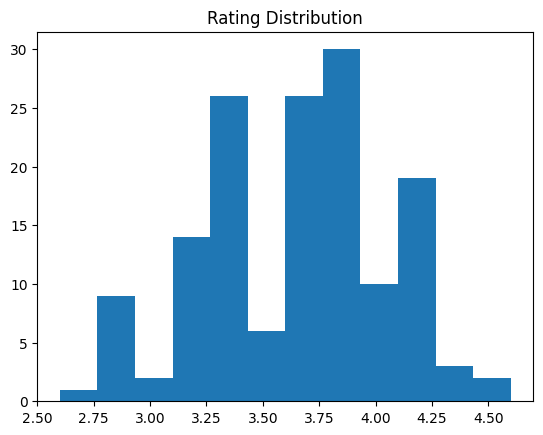

In [197]:
plt.hist(df["rate"], bins = 12)
plt.title("Rating Distribution")

Conclusion:- The Majority Restaurant Received Ratings From 3.5 to 4  

# Zomato has observed that most couples order most of their food online. What is their average spending on each order?

Text(0, 0.5, 'Count')

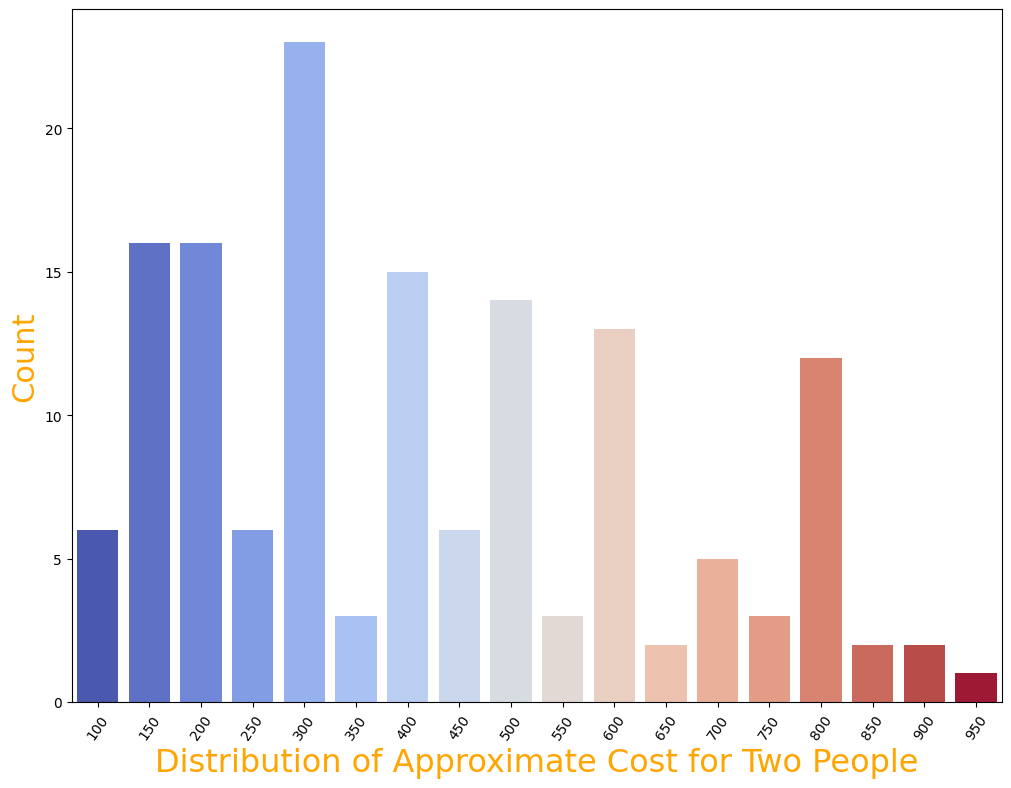

In [290]:
plt.figure(figsize = (12,9))
couple_data = df ["approx_cost(for two people)" ]
sns.countplot(x= couple_data , hue=couple_data, palette='coolwarm', legend=False)
plt.xticks(rotation=55)
plt.xlabel("Distribution of Approximate Cost for Two People" , c = "orange" ,size = 23)
plt.ylabel("Count" , c ="orange" , size = 22 )

Conclusion:- The Majority of Couples prefer Resturant with an approximate cost of 300/- Rupeess

# Which mode online / offline has received the maximum rating?

Text(0, 0.5, 'Rate')

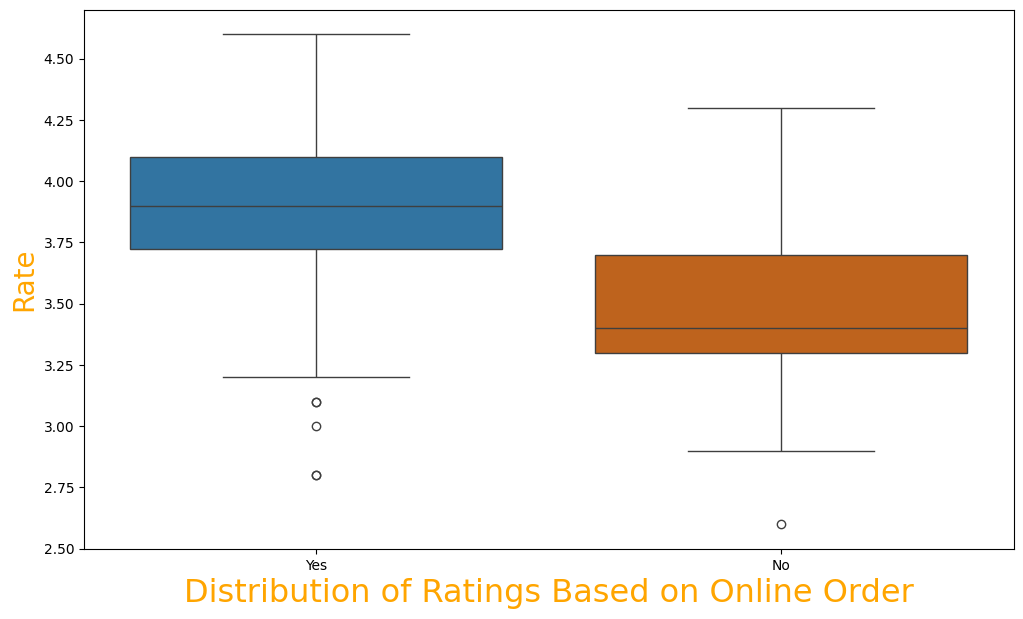

In [331]:
plt.figure(figsize = (12,7))
sns.boxplot(x="online_order", y="rate", hue = "online_order" , data=df,  palette={"Yes": "#1f77b4", "No": "#d95f02" }, legend=False )
plt.xlabel ("Distribution of Ratings Based on Online Order" , c= "orange" , size = 23)
plt.ylabel("Rate" , c = "orange" , size = 20)

Conclusion:- Offline order received lower Rating in comparsion to online order 

# Which type of restaurant received more offline orders, so that Zomato can provide those cstomers with some good offers?

Text(133.22222222222223, 0.5, 'Listed in (Type)')

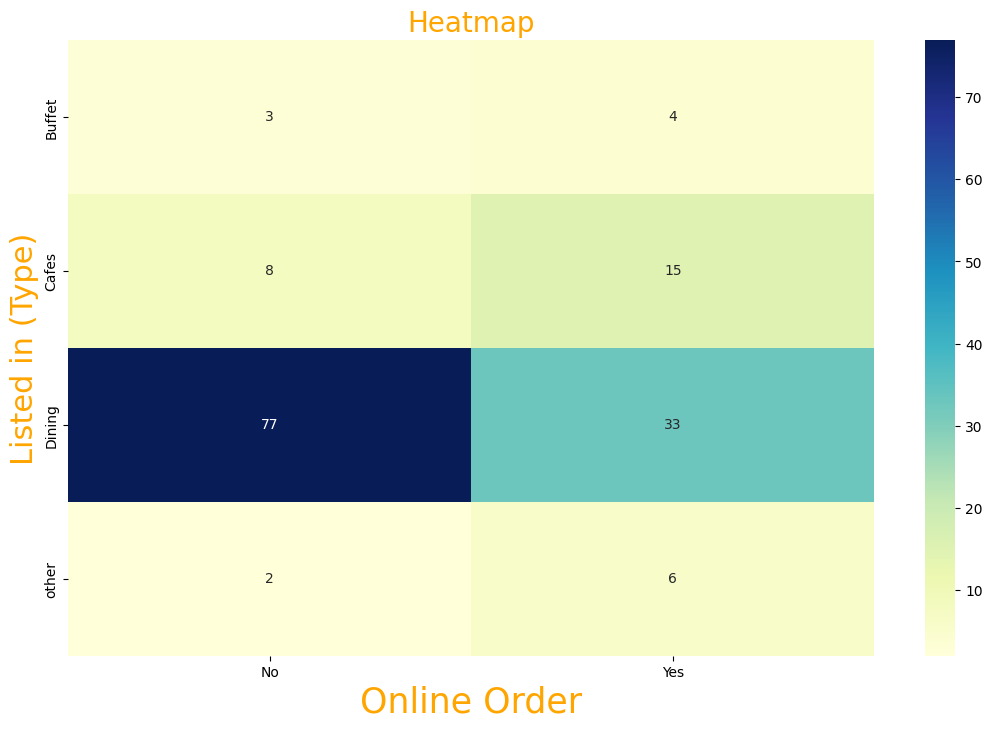

In [365]:
plt.figure(figsize = (13,8))
pivot_table = dataframe.pivot_table(index = "listed_in(type)", columns= "online_order" , aggfunc = "size" , fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap" , c = "orange" ,size = 20)
plt.xlabel("Online Order" , c= "orange" , size = 25)
plt.ylabel("Listed in (Type)" , c= "orange" , size = 22)

# CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes mainly receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.